In [118]:
#import Libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [119]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import PolynomialFeatures   # For Polynomial Regression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error # For Regression
from sklearn.metrics import r2_score # For Regression
from sklearn.metrics import mean_squared_error # For Regression



from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

pd.set_option('display.max_columns', 90) # by default 10, pandas will display all columns
pd.set_option('display.max_rows', 15) # by default 10, pandas will display all rows







In [120]:
# 1.Upload data
train = pd.read_csv('FINALPROJECT/train.csv')
test = pd.read_csv('FINALPROJECT/test.csv')
#review the shape
print(train.shape)
print(test.shape)

train

(29879, 19)
(29880, 18)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,Id
0,4,FLUSHING-NORTH,02 TWO FAMILY DWELLINGS,1,6359,4,,B1,13206 57 ROAD,,11355,2,0,2,1285,1762,2002,1050000,57110
1,5,NEW DORP-BEACH,02 TWO FAMILY DWELLINGS,1,4067,27,,B3,64 HETT AVENUE,,10306,2,0,2,5000,3450,1960,750000,80619
2,1,UPPER EAST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1582,46,,D4,"510 EAST 86TH STREET, 5A",,10028,0,0,0,-,-,1958,1075000,14307
3,5,ELTINGVILLE,01 ONE FAMILY DWELLINGS,1,5366,21,,A2,30 LISS STREET,,10312,1,0,1,4000,1056,1960,490000,77692
4,2,MOTT HAVEN/PORT MORRIS,27 FACTORIES,4,2340,28,,F4,2590 PARK AVENUE,,10451,0,1,1,50400,48952,1958,11000000,21755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29874,4,RIDGEWOOD,03 THREE FAMILY DWELLINGS,1,3482,59,,C0,807 WOODWARD AVENUE,,11385,3,0,3,1942,2967,1901,1350000,70888
29875,3,PARK SLOPE SOUTH,04 TAX CLASS 1 CONDOS,1C,1011,1001,,R6,401 10TH STREET,1,11215,1,0,1,0,0,1901,1650000,45187
29876,1,KIPS BAY,13 CONDOS - ELEVATOR APARTMENTS,2,969,1052,,R4,415 EAST 37TH STREET,8N,10016,1,0,1,-,-,1988,890000,6623
29877,1,UPPER WEST SIDE (59-79),10 COOPS - ELEVATOR APARTMENTS,2,1143,24,,D4,"119 WEST 71ST STREET, 8C",,10023,0,0,0,-,-,1913,1325000,15330


In [121]:
# 2.Data Exploration 
## Delete the columns with missing values more than 80%
col_plus_50_null = [col for col in train.columns if train[col].isnull().sum() > 0.5*train.shape[0]]
col_plus_50_null
#train.isnull().sum()[train.isnull().sum() > 0.8*train.shape[0]].index
#there is no Column with missing values more than 80% we dont drop the cols in test 
# if there is no cols with nulls we keep the same df

[]

#outlier detection
#REMOVE THE OUTLIERS FROM THE DATA
#IQR Score - Interquartile Range
#The IQR is the range of values within the 25th and 75th percentiles.
Q1 = train['SALE PRICE'].quantile(0.25)
Q3 = train['SALE PRICE'].quantile(0.75)
IQR = Q3 - Q1
train = train[~((train['SALE PRICE'] < (Q1 - 1.5 * IQR)) |(train['SALE PRICE'] > (Q3 + 1.5 * IQR)))]
train.shape

In [122]:
#transform the Columns GROSS SQUARE FEET AND LAND SQUARE FEET TO NUMERIC
train['GROSS SQUARE FEET'] = pd.to_numeric(train['GROSS SQUARE FEET'], errors='coerce')
train['LAND SQUARE FEET'] = pd.to_numeric(train['LAND SQUARE FEET'], errors='coerce')
#transform the Columns GROSS SQUARE FEET AND LAND SQUARE FEET TO NUMERIC in test
test['GROSS SQUARE FEET'] = pd.to_numeric(test['GROSS SQUARE FEET'], errors='coerce')
test['LAND SQUARE FEET'] = pd.to_numeric(test['LAND SQUARE FEET'], errors='coerce')

In [123]:
#show the type of the columns
train.dtypes

BOROUGH                      int64
NEIGHBORHOOD                object
BUILDING CLASS CATEGORY     object
TAX CLASS AT PRESENT        object
BLOCK                        int64
                            ...   
LAND SQUARE FEET           float64
GROSS SQUARE FEET          float64
YEAR BUILT                   int64
SALE PRICE                   int64
Id                           int64
Length: 19, dtype: object

In [124]:
#check the missing values
train.isnull().sum().sort_values(ascending=False)

GROSS SQUARE FEET          10794
LAND SQUARE FEET           10504
BOROUGH                        0
ZIP CODE                       0
SALE PRICE                     0
                           ...  
LOT                            0
BLOCK                          0
TAX CLASS AT PRESENT           0
BUILDING CLASS CATEGORY        0
Id                             0
Length: 19, dtype: int64

In [125]:
#Check the unique values in TAX CLASS CATEGORY
train['TAX CLASS AT PRESENT'].unique()

array(['1', '2', '4', '1B', '2A', '2C', '1A', '2B', '1C', ' '],
      dtype=object)

In [126]:
#separacion of the data
#numerical = train.select_dtypes(include=['int64', 'float64']) #select and extract the numerical columns
#numerical
numerical = train.select_dtypes(include=np.number).columns.tolist() #list the numerical columns
numerical.remove('SALE PRICE')
nominal = train.select_dtypes(exclude=np.number).columns.tolist() #list the nominal columns
#ordinal = ['TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT','LAND SQUARE FEET', 'GROSS SQUARE FEET']
#remove the ordinal columns from nominal
ordinal = []
nominal = [x for x in nominal if x not in ordinal]
#print the columns names
print(numerical)
print(nominal)
print(ordinal)
#transform the ordinal columns to numerical

#split the data into train and test
X = train[numerical + ordinal + nominal]
y = train['SALE PRICE']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_Real = test[numerical+ ordinal + nominal] #test for kaggle

print(y_test.head())

['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'Id']
['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER']
[]
5940      875000
20893     877000
12971    6925000
29249    1080000
15672     605858
Name: SALE PRICE, dtype: int64


In [127]:
# 3.Data Preprocessing
## Pipeline auxiliary function work with the different data types

#Ordinal Encoder
ordinal_p = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OrdinalEncoder()),
])
#Nominal Encoder
nominal_p = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(sparse = True ,handle_unknown='ignore'))
])
#Numerical Scaling
numerical_p = Pipeline([
    ("imputer" , SimpleImputer(strategy='mean')), #median is the default strategy we can change to mean
    ("scaler", StandardScaler())
])

#Final Pipeline
preprocessing_pipeline = ColumnTransformer([
    ("nominal_prep", nominal_p, nominal),
    ("ordinal_prep", ordinal_p, ordinal),
    ("numerical_prep", numerical_p, numerical)
])
#I can use make_pipeline(preprocessing_pipeline)

In [128]:
#Complete Pipeline
#ML_model = LinearRegression()
#ML_model = Lasso(alpha=190)
ML_model = Ridge(alpha=20)
#ML_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)

complete_pipeline = make_pipeline(preprocessing_pipeline, ML_model)


In [133]:
#complete_pipeline

ERROR PREDICTIONS
MAE 1381841.2284836913
MSE 36933593916162.945
RMSE 6077301.532437151
R2 0.8540008578505007


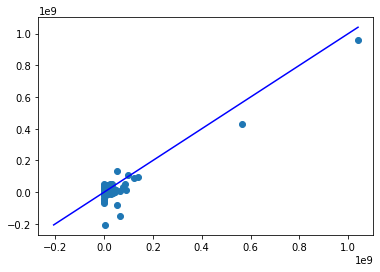

In [130]:
#4. Prediction and Evaluation

complete_pipeline.fit(x_train, y_train)

y_pred = complete_pipeline.predict(x_test)

print('ERROR PREDICTIONS')
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2', metrics.r2_score(y_test, y_pred))

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.scatter(y_test, y_pred)



In [131]:
#Generate a File with the predictions
y_Real_test = complete_pipeline.predict(X_Real)

pred = pd.DataFrame(y_Real_test)
sub_df = pd.read_csv('FINALPROJECT/sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('sample_submission.csv', index=False)


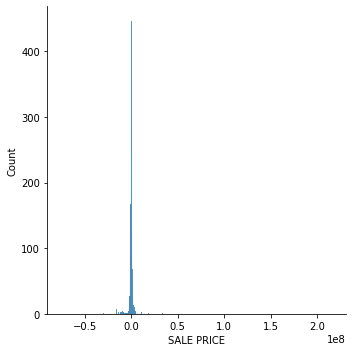

In [135]:
sns.displot(y_test-y_pred)